# Incremental Searches Method

*Day 1, 06/10/2024*

The **incremental searches method** is used to locate intervals where a continuous function $ f(x) $ changes sign, indicating the presence of at least one root (in particular an odd number of roots). The method starts from an initial guess $ x_0 $ and evaluates the function at that point. Then, it moves incrementally by a small value $ \Delta x $ and evaluates the function at each new point.

The key theoretical foundation is based on the **Intermediate Value Theorem**, which states that if a continuous function changes sign over an interval $[x_0, x_1]$, meaning $ f(x_0) f(x_1) < 0 $, then there must be at least one root within that interval. The method continues searching in this way, increasing the interval until either a root is found or the function changes sign, indicating the presence of a root between two points.

If the function at any point is zero, that point is considered a root. If after a specified number of iterations no root is found, the method terminates, indicating failure.

In [18]:
# Incremental searches method

def incremental_searches(f, x0, delta, Niter = 100):
    fx0 = f(x0)
    if fx0 == 0:
        print(str(x0) + 'is a root for f(x)')
        return x0
    else:
        x1 = x0 + delta
        cont = 1
        fx1 = f(x1)

        while fx0 * fx1 > 0  and cont < Niter:
            x0 = x1
            fx0 = fx1
            x1 = x0 + delta
            fx1 = f(x1)
            cont += 1

        if fx1 == 0:
            print(str(x1) + 'is a root for f(x)')
            return x0
        elif fx0 * fx1 < 0:
            print('There exists a root between ' + str(x0) + '  and ' + str(x1))
            return None
        else:
            print(f'The method failed in {Niter} iterations (no roots found)')
            return None

In [39]:
# Graph the function in the interval [a, b]
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]
})

def graph_function_and_interval(a, b, f, delta = 0.01):

    x = np.arange(a, b, delta)
    image_of_x = f(x)

    plt.plot(x, image_of_x, label = '$f(x)$')

    plt.grid(True)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()

    plt.show()

### Transcendental Equation for Energy Levels of a Quantum Particle in a Finite Potential Well

To describe the quantum state of the particle, we solve the **time-independent Schrödinger equation**:

$$ -\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x) $$

For a **finite potential well**, the potential $V(x)$ is defined as:
- $V(x) = 0$ for $0 < x < L$ (inside the well),
- $V(x) = V_0$ outside the well (for $x < 0$ or $x > L$).

To find the allowed energy levels $E$, we solve the Schrödinger equation inside and outside the potential well. Inside the well ($0 < x < L$), the particle behaves like a free particle, and the general solution for the wave function is a combination of sine and cosine functions:

$$ \psi(x) = A \sin(kx) + B \cos(kx) $$

Where:
- $k = k(E) = \sqrt{\frac{2mE}{\hbar^2}}$ is the wavenumber related to the energy $E$ of the particle.

Matching the wave functions and their derivatives at the boundaries of the well ($x = 0$ and $x = L$) results in the following transcendental equation for the energy levels $E$:

$$ k \tan(kL) = \sqrt{\frac{2m(V_0 - E)}{\hbar^2}} $$

Where:
- $k(E)$ is the wavenumber inside the well,
- $L$ is the width of the potential well,
- $m$ is the mass of the particle,
- $E$ is the energy of the particle,
- $V_0$ is the depth of the potential well,
- $\hbar$ is the reduced Planck constant.

To use numerical methods, we find the zeros of the function:

$$f(E) = \sqrt{\frac{2m(V_0 - E)}{\hbar^2}} - k(E) \tan(k(E)\cdot L)$$

¿Where are the zeros of the function? ¿Where is the first one? (the fundamental energy level)


There exists a root between 0.00015940000000000303  and 0.00015950000000000304


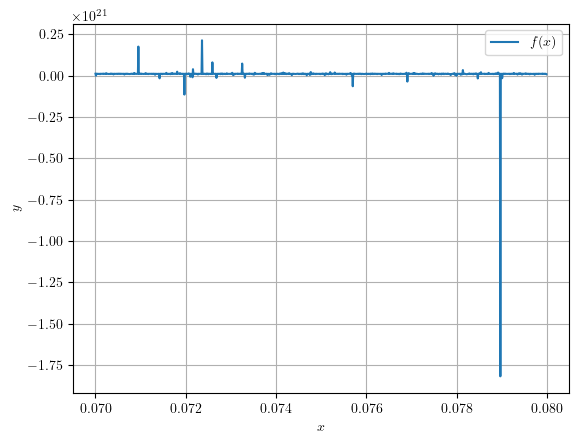

In [47]:
# Constants in eV
L = 1e-10                           # Width of the well in meters (angstrom scale)
m_e = 0.511e6                       # Mass of the electron in eV/c^2 (MeV)
V0 = 50                             # Potential well depth in eV
hbar = 6.582119e-16                 # Reduced Planck's constant in eV·s

# Algorithm parameters
x0 = 0                              # Initial energy guess in eV
delta = 0.0000001                         # Step size for incremental search in eV

# Define the transcendental equation for energy levels f(E)
def eigen_energies(E):
    k = np.sqrt(2 * m_e * E) / hbar
    return np.sqrt(2 * m_e * (V0 - E)) / hbar - k * np.tan(k * L)


# Add a %timeit before to time the algorithm
incremental_searches(f = eigen_energies, x0 = x0, delta = delta, Niter = 10000000)

graph_function_and_interval(0.07, 0.08, eigen_energies, delta = 0.00001)